<a href="https://colab.research.google.com/github/kashifkhan9555/CoronaVirus_Tewwt_Sentiment_Analysis/blob/main/CoronaVirus_Tewwt_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

#Importing Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/coronatweet/Coronavirus Tweets.csv', encoding = 'latin1')

### Dataset First View

In [4]:
# Dataset First Look
df.head

<bound method NDFrame.head of        UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @MeNyrb

In [5]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [7]:
# Dataset Info
df.info

<bound method DataFrame.info of        UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @MeNy

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()


UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<Axes: >

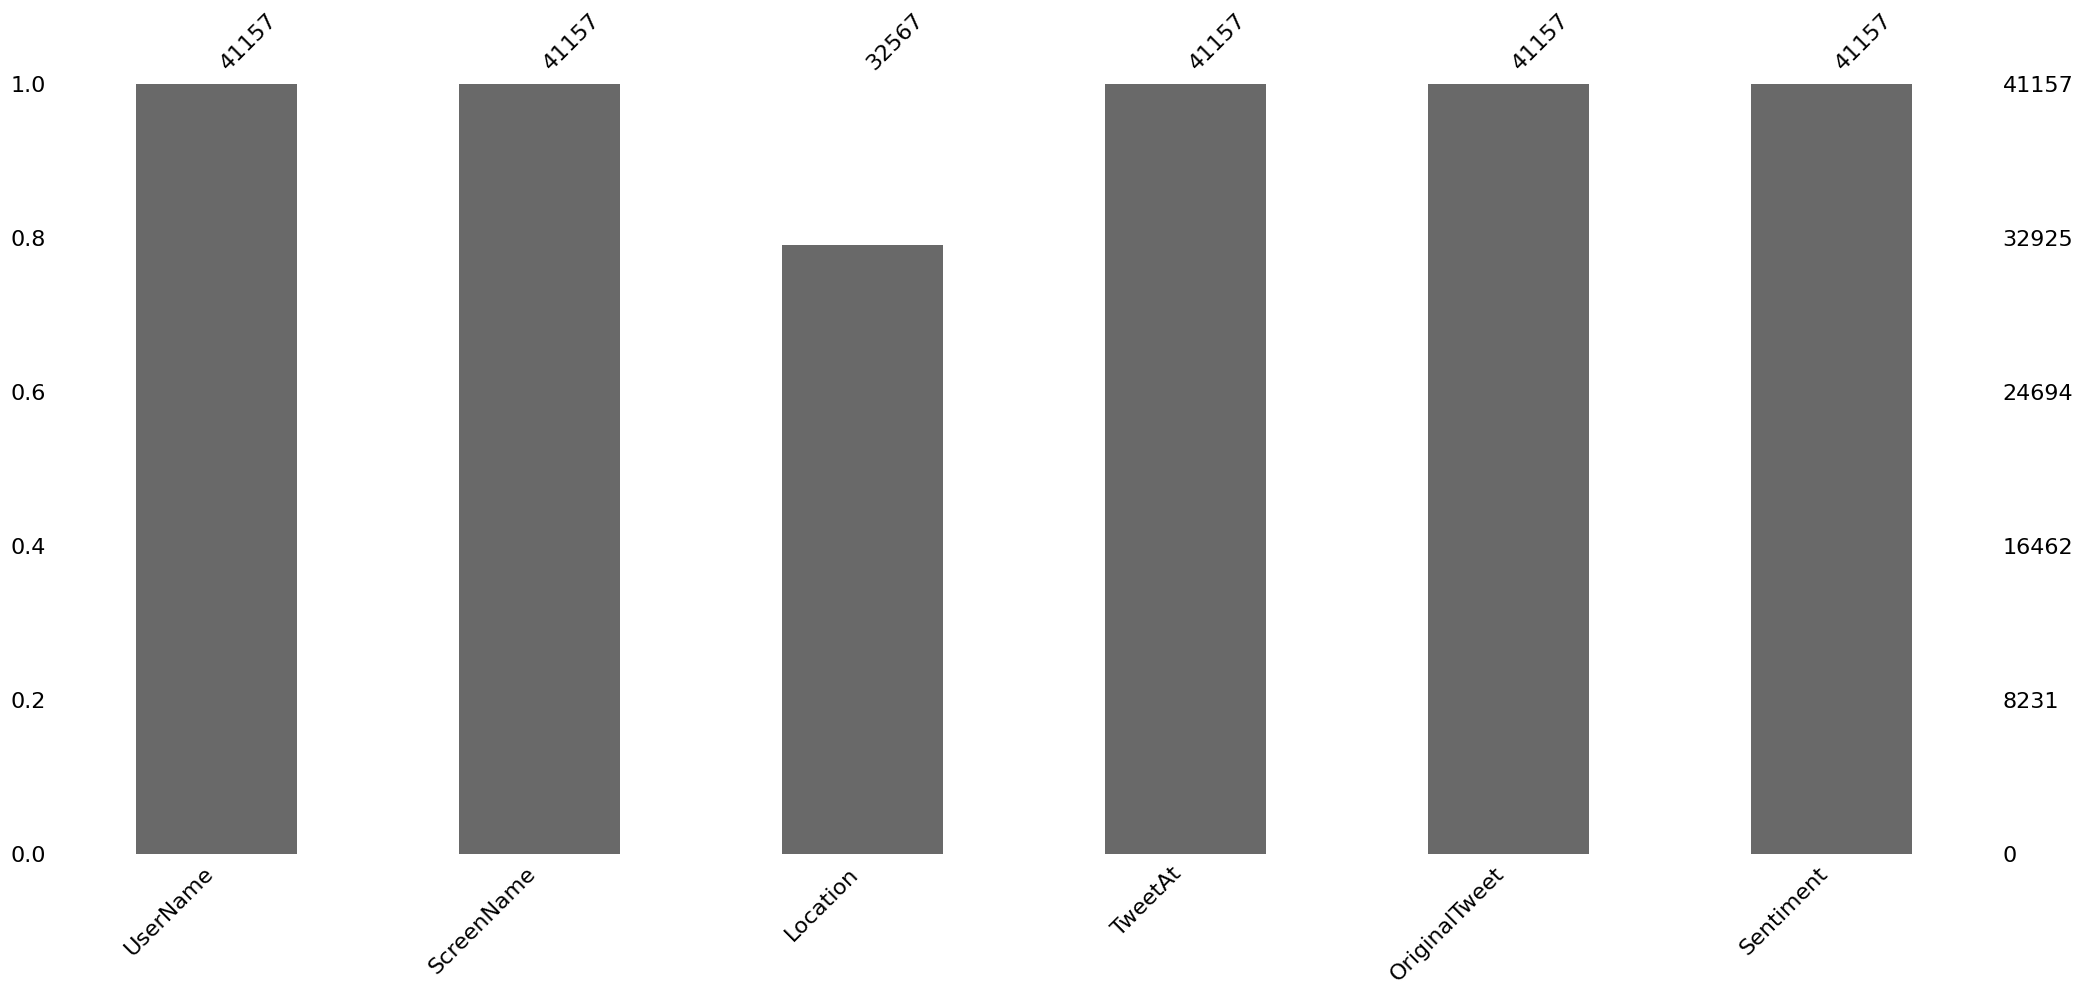

In [10]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Variables Description

Columns names are :-

Username - Coded Username
ScreenName- Coded ScreenName
Location- Region of origin
TweetAt- Tweet Timing
OriginalTweet- First tweet in the thread
Sentiment- Sentiment of the tweet

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for column in df.columns:
  unique_values = df[column].unique()
  print(f"Unique values for {column}: {unique_values}" )

Unique values for UserName: [ 3799  3800  3801 ... 44953 44954 44955]
Unique values for ScreenName: [48751 48752 48753 ... 89905 89906 89907]
Unique values for Location: ['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']
Unique values for TweetAt: ['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']
Unique values for OriginalTweet: ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shoppin

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df.dropna(inplace=True)

In [15]:
df.shape

(32567, 6)

In [16]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

### What all manipulations have you done and insights you found?

Drop the null values and now value is 32567

Check the Locations lenght which is 12220

Check the sentiment column and found there are 5 unique values in this column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [17]:
# Chart - 1 visualization code
# Tweet count for each sentiment
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count


,Sentiment,count
0,Positive,9110
1,Negative,7763
2,Neutral,6172
3,Extremely Positive,5273
4,Extremely Negative,4249


Text(0, 0.5, 'count')

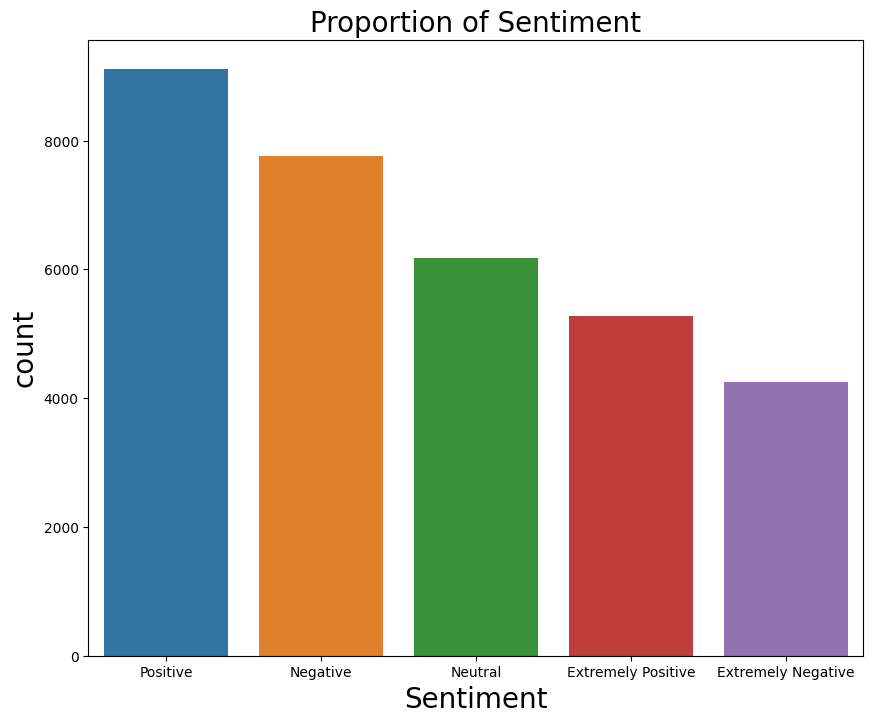

In [18]:
#visualize the tweet count of sentiment
plt.figure(figsize=(10,8))
tc = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
tc.set_title("Proportion of Sentiment", fontsize=20)
tc.set_xlabel("Sentiment", fontsize=20)
tc.set_ylabel('count', fontsize=20)

##### 1. Why did you pick the specific chart?

To visualize the tweet count of sentiment

##### 2. What is/are the insight(s) found from the chart?

There are 5 different sentiment but majority of sentiment is positive which is more than 10,000, then negative which is 10,000 and then neutral which is more than 7,000 tweets. Least 2 are extreamly positive and extreamly negative

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the sentiment of the tweets, It can gain valuable insights into users opinions, preferences, and satisfaction levels.

#### Chart - 2

In [19]:
# Chart - 2 visualization code
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [20]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,14383
1,Negative,12012
2,Neutral,6172


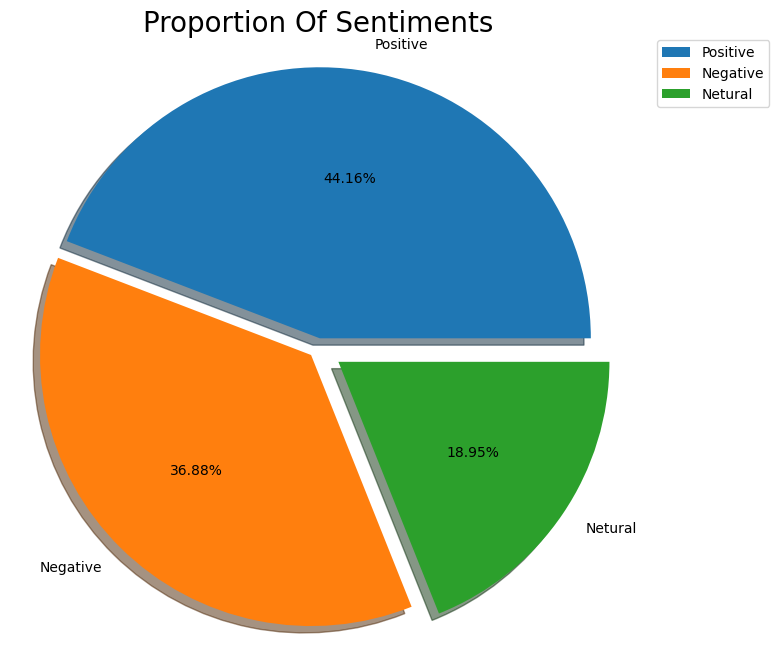

In [21]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

We have merge data of extreamly positive in positive and extramly negative in negative and then visualize the data and find out the percentage of different sentiments.

##### 2. What is/are the insight(s) found from the chart?

There are 43.85 percent of positive tweet count, 37.41 percent of negative tweet count and 18.74 percent of neutral tweet count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the sentiments can still help create a positive business impact, despite the slightly lower percentage of positive tweets compared to negative tweets. By understanding the sentiment distribution among the tweets, it can still extract valuable information about users perceptions.

#### Chart - 3

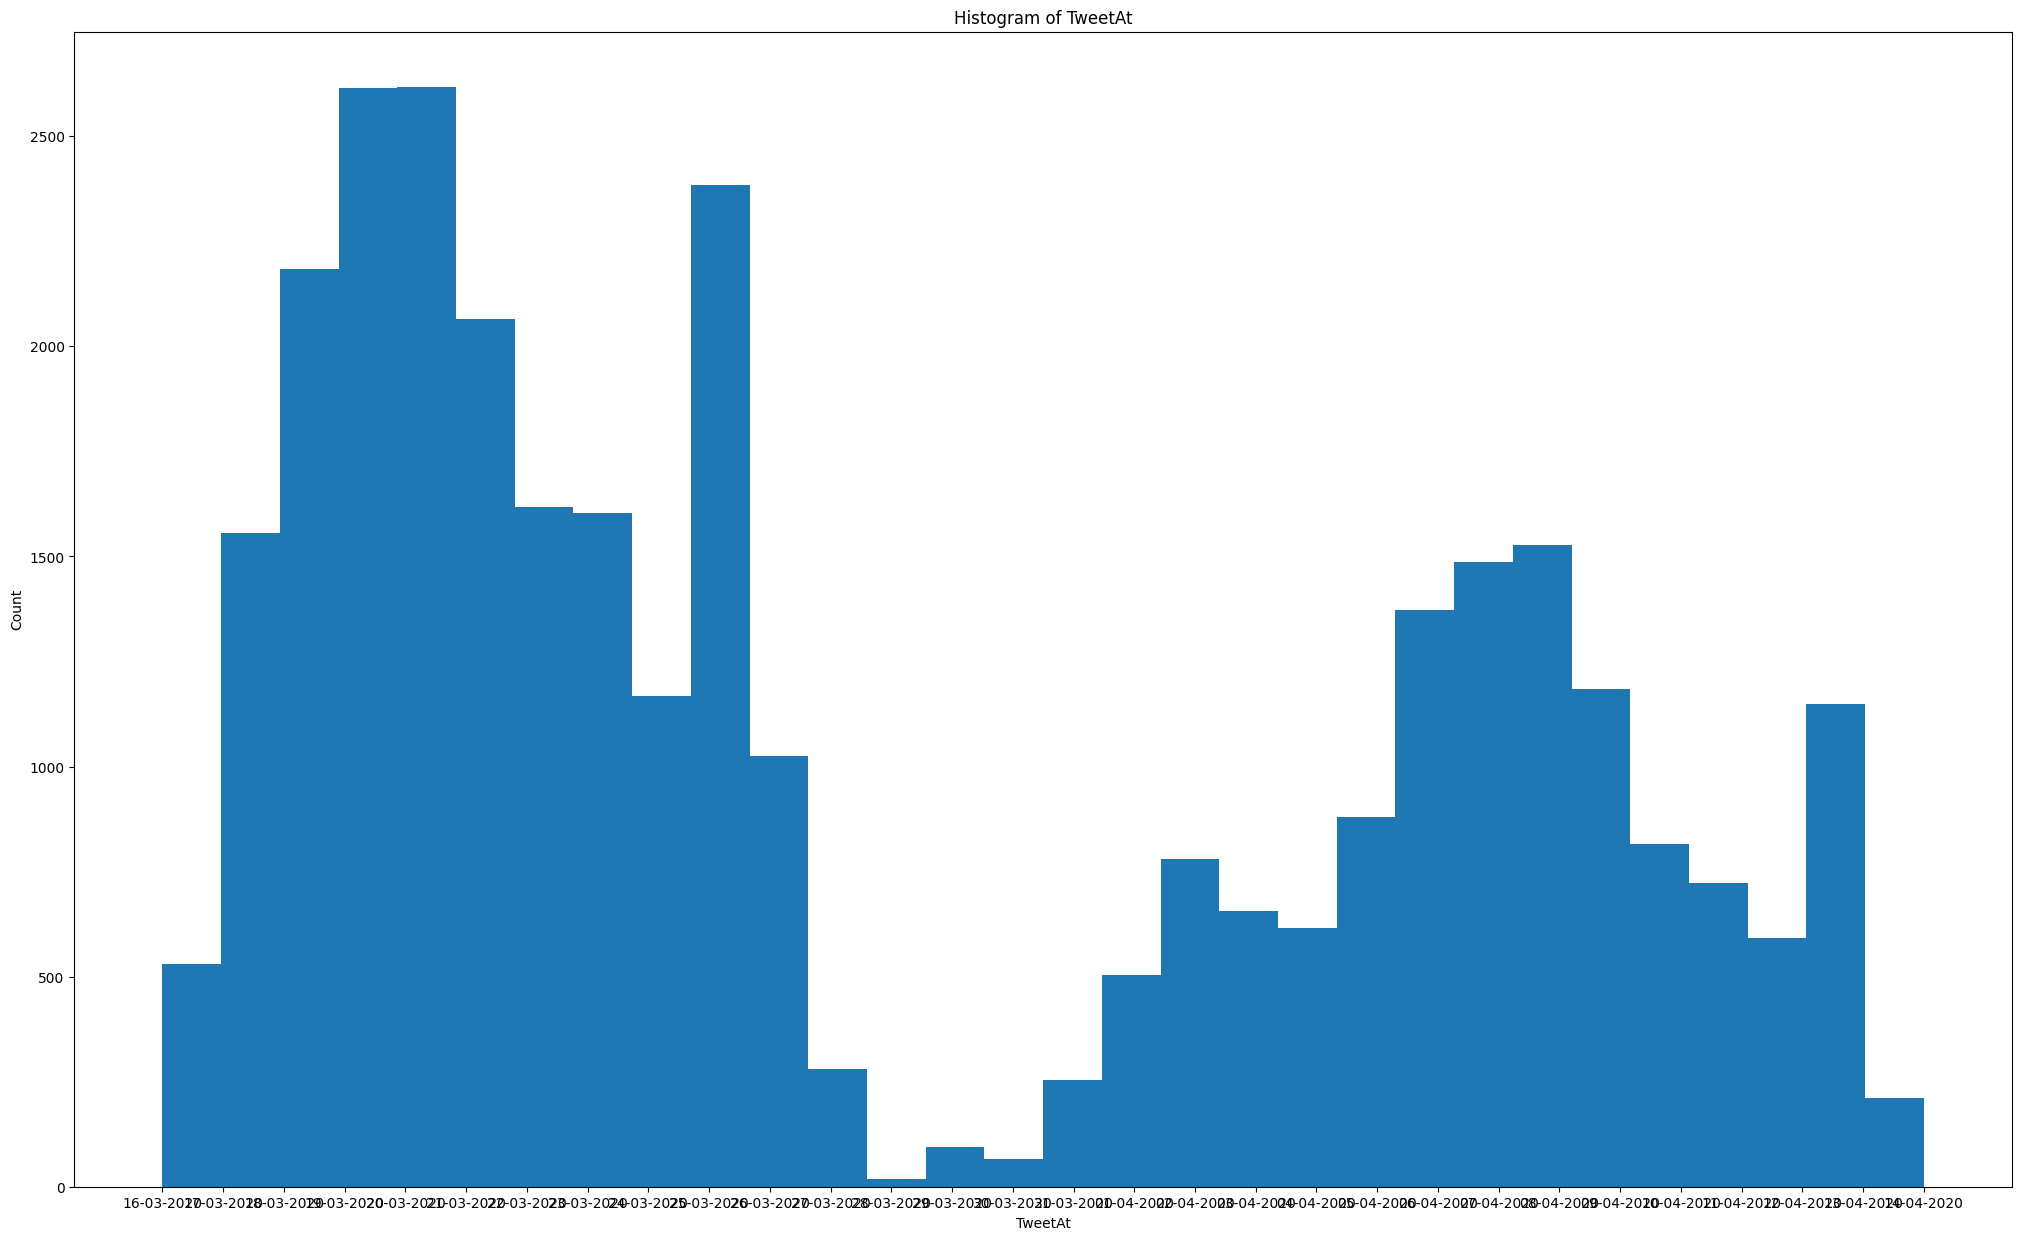

In [22]:
# Chart - 3 visualization code
#CountPlot for OriginalTweet according to "TweetAt" column
plt.figure(figsize=(25, 15))
plt.hist(df['TweetAt'], bins=30)
plt.xlabel('TweetAt')
plt.ylabel('Count')
plt.title('Histogram of TweetAt')
plt.show()


##### 1. Why did you pick the specific chart?

To check the highest number of tweet in a particular date

##### 2. What is/are the insight(s) found from the chart?

the highest number of tweet done at 20 march 2020 which is approx 3500. Least tweet done at 28 march 2020 which is approx 50 tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Negative Business Impact: The insights gained from the low number of tweets on 28th March 2020 can indicate potential negative impacts on the business:

Lack of Engagement: A significantly low volume of tweets on a specific date suggests a lack of engagement or interest from users

#### Chart - 4

In [23]:
# Chart - 4 visualization code
#find the top 10 location vale count
top_location = df['Location'].value_counts().sort_values(ascending=False)[:10]
top_location

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

<Figure size 1800x800 with 0 Axes>

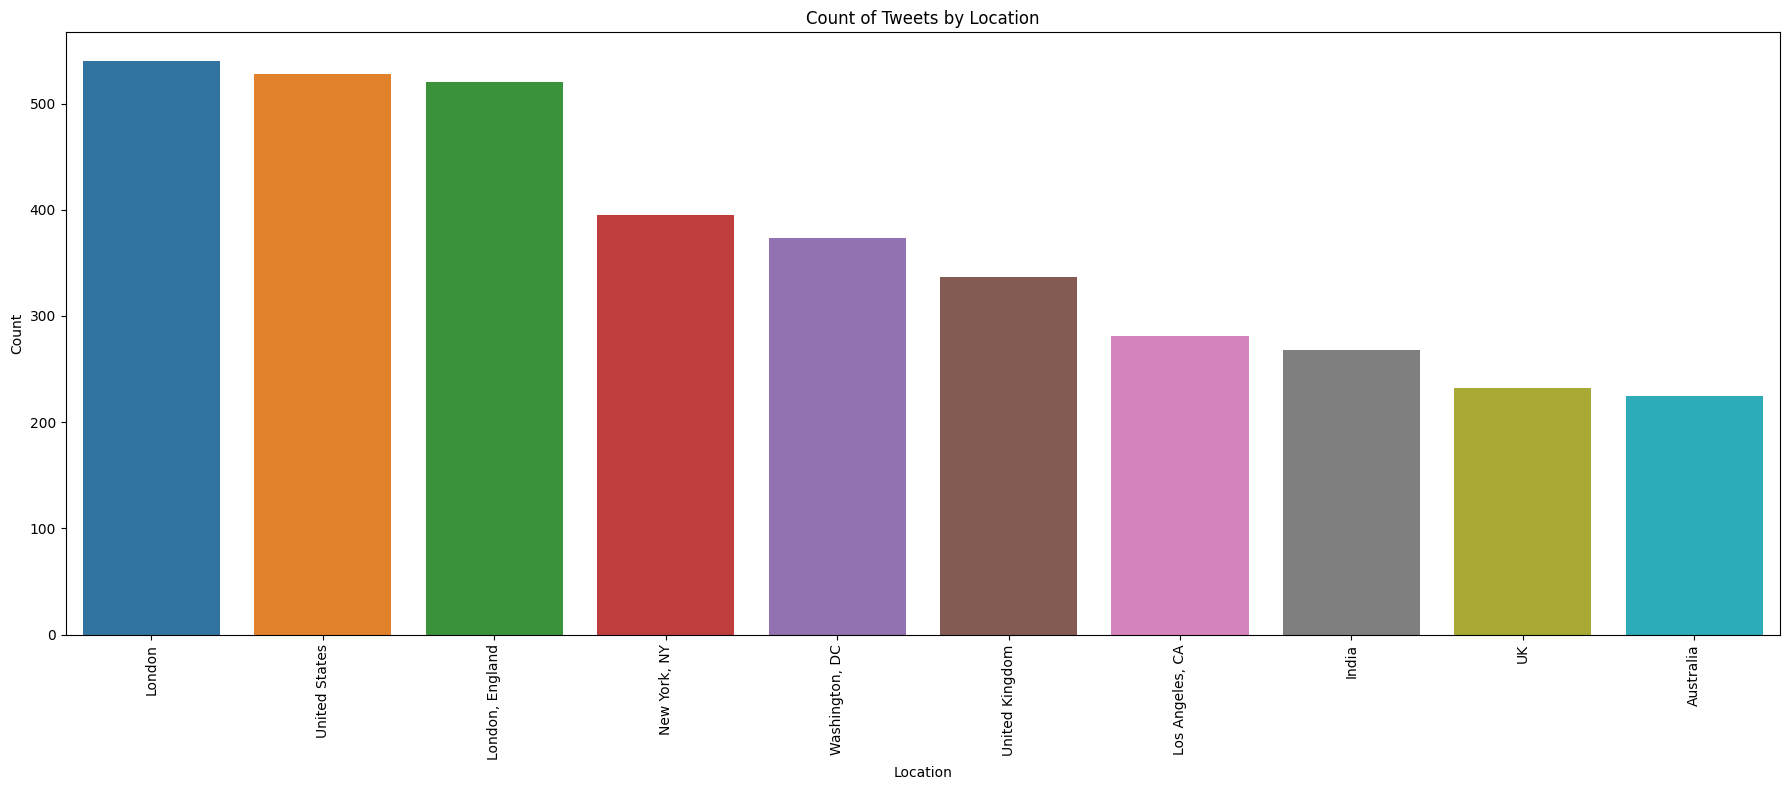

In [24]:
plt.figure(figsize=(18,8))
plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Location'].isin(top_location.index)], x='Location', order=top_location.index)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Tweets by Location')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To check the top 10 location from where the highest number of tweet is coming from

##### 2. What is/are the insight(s) found from the chart?

the highest number of tweets are coming from London, US and London-England which is approx 500.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

no there is not a negatie impact

#### Chart - 5

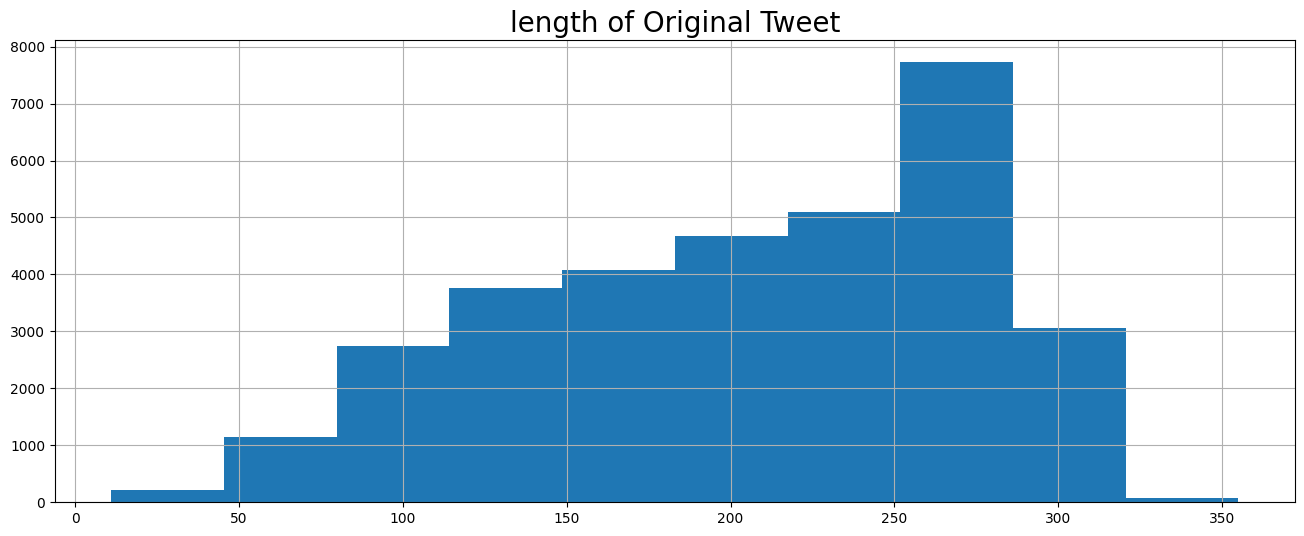

In [25]:
# Chart - 5 visualization code
#plot of the length of OriginalTweet.
plt.figure(figsize=(16,6))
plt.grid()
plt.title('length of Original Tweet', fontsize = 20)
plt.hist(df['OriginalTweet'].str.len())
plt.show()


##### 1. Why did you pick the specific chart?

To observe the length of original tweets.

##### 2. What is/are the insight(s) found from the chart?

A 10,000 tweets is written about 275 words and this is highest. And average tweet length range is from 200 to 250.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

Longer tweets with more words allow users to convey more detailed information about Corona virus.

#### Chart - 6

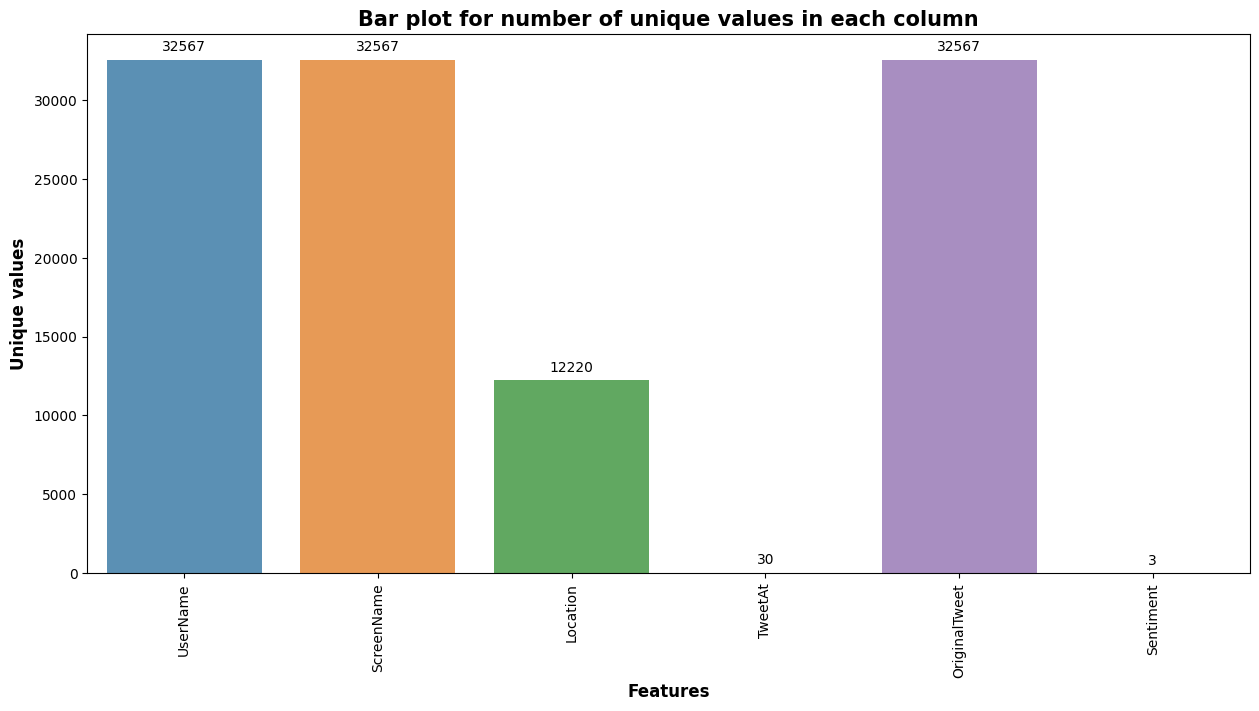

In [27]:
# Chart - 6 visualization code
#Unique value in each feature columns
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique



f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To identify the unique values in each column

##### 2. What is/are the insight(s) found from the chart?

Username, screenname and original tweets have unique values but sentiment and sentiment numeric has least unique values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

The unique values of original tweets suggest that users are producing a variety of content, which can be beneficial for attracting and engaging a wider audience.

#### Chart - 7

In [28]:
# Chart - 7 visualization code
# Importing the required library
from collections import defaultdict

# Copying the dataframe
df1 = df.copy()

# Creating the new column 'Text'
df1['text'] = df1.OriginalTweet
df1["text"] = df1["text"].astype(str)

In [29]:
def create_corpus(target):
    corpus=[]

    for x in df1[df1['Sentiment']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [30]:
corpus= create_corpus("Positive")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

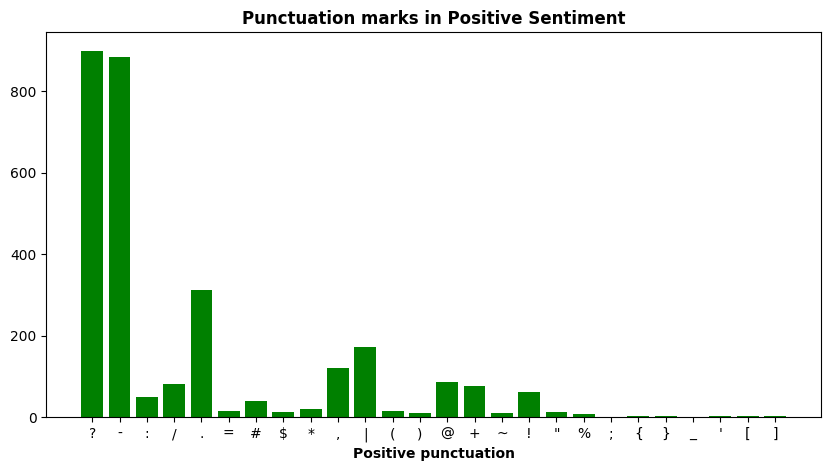

In [31]:

# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='green')
plt.xlabel('Positive punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Positive Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To get the punctuation mark in positive sentiments

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 8

In [32]:
# Chart - 8 visualization code
# Designing a compilation to emphasize a Negative sentiment.
corpus= create_corpus("Negative")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

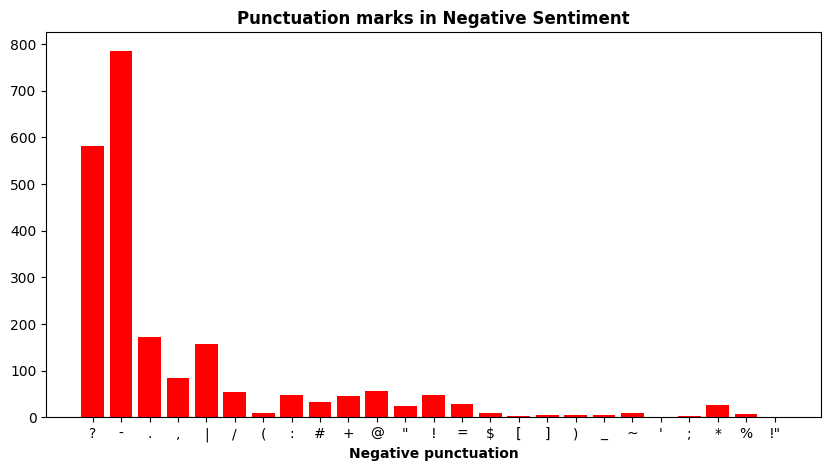

In [33]:
# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='Red')
plt.xlabel('Negative punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Negative Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To get the punctuation mark in negative sentiments

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# Designing a compilation to emphasize a neutral sentiment.
corpus= create_corpus("Neutral")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

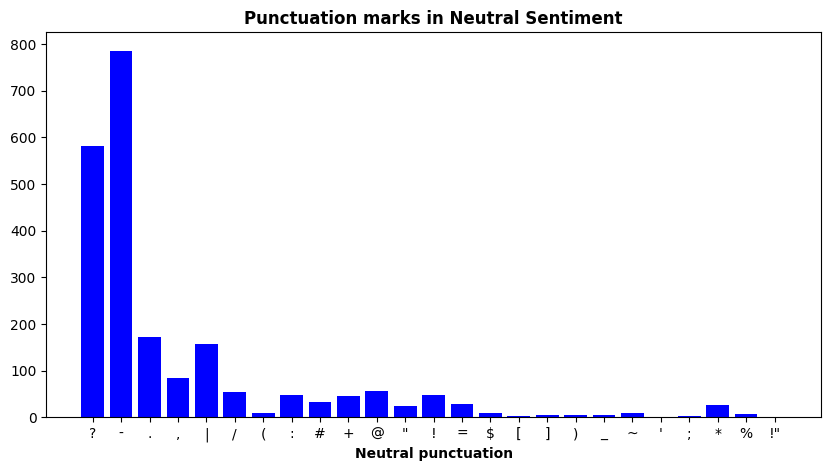

In [34]:
# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='blue')
plt.xlabel('Neutral punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Neutral Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

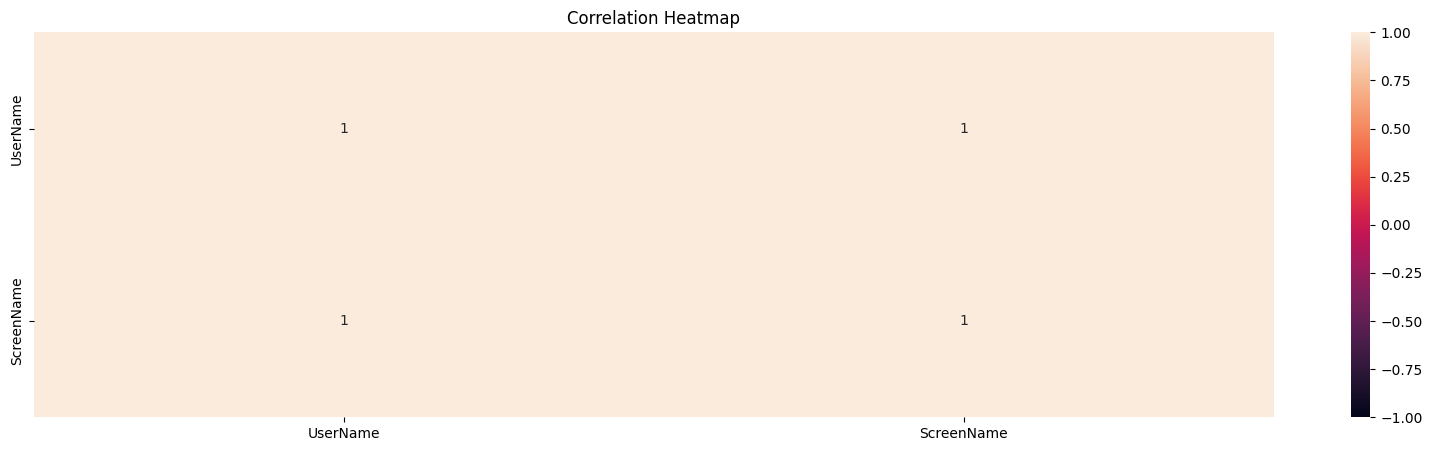

In [26]:
# Correlation Heatmap visualization code
# check for existence of corelation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )

##### 1. Why did you pick the specific chart?

To check the co-relation between username, screenname and sentiment numeric.

##### 2. What is/are the insight(s) found from the chart?

Are there any insights that lead to negative growth? Justify with specific reason.

there is a strong correlation between username and screen name, it indicates that users are aligning their online identities and followers easily identify

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# i have already done

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [35]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder
# Perform label encoding
label_encoder = LabelEncoder()
df['Location_Encoded'] = label_encoder.fit_transform(df['Location'])

# Print the encoded dataframe
print(df)


       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
5          3804       48756     ÃT: 36.319708,-82.363649  16-03-2020   
6          3805       48757          35.926541,-78.753267  16-03-2020   
...         ...         ...                           ...         ...   
41147     44946       89898                  Brooklyn, NY  14-04-2020   
41149     44948       89900              Toronto, Ontario  14-04-2020   
41150     44949       89901                          OHIO  14-04-2020   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [47]:
# Expand Contraction
#Define contraction mapping dictionary
contractions = {"I'm": 'I am', "You're": 'You are', "I'll": 'I will',"He's": 'He is', "She's": 'She is', "It's": 'It is',"What's":'what is'}

# Function to expand contractions
def expand_contractions(text):
    words = text.split()
    expanded_words = [contractions[word] if word in contractions else word for word in words]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Apply expansion of contractions
df['Sentiment_Expanded'] = df['Sentiment'].apply(expand_contractions)

# Print the expanded dataframe
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        london  16-03-2020   
1          3800       48752                            uk  16-03-2020   
2          3801       48753                     vagabonds  16-03-2020   
5          3804       48756     ãt: 36.319708,-82.363649  16-03-2020   
6          3805       48757          35.926541,-78.753267  16-03-2020   
...         ...         ...                           ...         ...   
41147     44946       89898                  brooklyn, ny  14-04-2020   
41149     44948       89900              toronto, ontario  14-04-2020   
41150     44949       89901                          ohio  14-04-2020   
41152     44951       89903  wellington city, new zealand  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet Sentiment  \
0      @menyrbie @phil_gahan @chrisitv https://t.co/i

#### 2. Lower Casing

In [48]:
# Lower Casing
# Convert all columns to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Print the modified dataframe
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        london  16-03-2020   
1          3800       48752                            uk  16-03-2020   
2          3801       48753                     vagabonds  16-03-2020   
5          3804       48756     ãt: 36.319708,-82.363649  16-03-2020   
6          3805       48757          35.926541,-78.753267  16-03-2020   
...         ...         ...                           ...         ...   
41147     44946       89898                  brooklyn, ny  14-04-2020   
41149     44948       89900              toronto, ontario  14-04-2020   
41150     44949       89901                          ohio  14-04-2020   
41152     44951       89903  wellington city, new zealand  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet Sentiment  \
0      @menyrbie @phil_gahan @chrisitv https://t.co/i

#### 3. Removing Punctuations

In [49]:
# Remove Punctuations
# Text Cleaning
df = df.copy()

In [55]:
df['Clean_tweet'] = df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk your neighbours family exchange ph...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia: woolworths give elderly...
5,3804,48756,"ãt: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,positive,12171,positive,news the regionâs first confirmed covid-19 ca...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,positive,296,positive,cashier grocery store was sharing his insights...


In [56]:
# remove special characters, numbers, punctuations
df['Clean_tweet'] = df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk your neighbours family exchange ph...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia woolworths give elderly ...
5,3804,48756,"ãt: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,positive,12171,positive,news the region s first confirmed covid case c...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,positive,296,positive,cashier grocery store was sharing his insights...


#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
# Remove URLs & Remove words and digits contain digits
#Remove @person character
import re
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [53]:
# Removing url, http, etc.
# create new column with removed @user
df['Clean_tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')
df.head()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https://t.co/ifz9fan2pa and https://t.co/xx...
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk to your neighbours family to excha...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia: woolworths to give elde...
5,3804,48756,"ãt: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,positive,12171,positive,as news of the regionâs first confirmed covid...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,positive,296,positive,cashier at grocery store was sharing his insig...


In [54]:

# Removing short words
# remove short words
df['Clean_tweet'] = df['Clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https://t.co/ifz9fan2pa and https://t.co/xx6gh...
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk your neighbours family exchange ph...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia: woolworths give elderly...
5,3804,48756,"ãt: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,positive,12171,positive,news the regionâs first confirmed covid-19 ca...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,positive,296,positive,cashier grocery store was sharing his insights...


#### 5. Removing Stopwords & Removing White spaces

In [57]:
# Remove Stopwords
# Downloading stopwords library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
# Remove White spaces
from nltk.corpus import stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [59]:
def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in sw]

  # joining the list of words with space separator
  return " ".join(text)


In [60]:
df['Clean_tweet'] = df['Clean_tweet'].apply(remove_stopwords)


# Obtaining top 5 rows after stopwords removal
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk neighbours family exchange phone n...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia woolworths give elderly ...
5,3804,48756,"ãt: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,positive,12171,positive,news region first confirmed covid case came su...
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,positive,296,positive,cashier grocery store sharing insights #covid ...


In [61]:
# Remove white spaces from the 'Clean_tweet' column
df['Clean_tweet'] = df['Clean_tweet'].str.strip()

# Print the modified DataFrame
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        london  16-03-2020   
1          3800       48752                            uk  16-03-2020   
2          3801       48753                     vagabonds  16-03-2020   
5          3804       48756     ãt: 36.319708,-82.363649  16-03-2020   
6          3805       48757          35.926541,-78.753267  16-03-2020   
...         ...         ...                           ...         ...   
41147     44946       89898                  brooklyn, ny  14-04-2020   
41149     44948       89900              toronto, ontario  14-04-2020   
41150     44949       89901                          ohio  14-04-2020   
41152     44951       89903  wellington city, new zealand  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet Sentiment  \
0      @menyrbie @phil_gahan @chrisitv https://t.co/i

#### 6. Rephrase Text

In [62]:
# Rephrase Text
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Define a function to rephrase a sentence
def rephrase_sentence(sentence):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Iterate over each word and find synonyms
    rephrased_words = []
    for word in words:
        # Get synonyms for each word
        synonyms = wordnet.synsets(word)

        if synonyms:
            # Choose a random synonym as the rephrased word
            rephrased_word = synonyms[0].lemmas()[0].name()
        else:
            # If no synonyms found, keep the original word
            rephrased_word = word

        rephrased_words.append(rephrased_word)

    # Join the rephrased words to form a rephrased sentence
    rephrased_sentence = ' '.join(rephrased_words)
    return rephrased_sentence

# Assuming you have a DataFrame named 'df' with a column containing the text data
# Replace 'your_column' with the actual column name in your DataFrame

# Apply the rephrase_sentence function to the text column
df['RephrasedText'] = df['Clean_tweet'].apply(rephrase_sentence)

# Display the rephrased text
print(df['RephrasedText'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0                                                         
1        advice talk neighbor family exchange telephone...
2        coronavirus Australia Woolworth give aged disa...
5        news region first confirm covid case come Sull...
6        teller grocery_store shop sharing penetration ...
                               ...                        
41147    truly defecation much home # covid # coronavir...
41149    still shock number # Toronto supermarket emplo...
41150    never situation ampere universe departure supe...
41152    airline pilot offer stock supermarket shelf # ...
41156    well new use rift departure amazon although co...
Name: RephrasedText, Length: 32567, dtype: object


#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***